In [28]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..', 'src'))
print(module_path)
# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
# Now you can import the desired function or class
from graph_helpers import *
from helpers import *
from mod_si import *
from find_net_stats import *
from matplotlib.patches import Patch

/nfs/nfs9/home/nobackup/vakrao/nz_model/src
/nfs/nfs9/home/nobackup/vakrao/nz_model/src


In [29]:
hort_data = "../params/horticulture365_check_NZ.csv"
G,id_idx = create_directed_network(hort_data)
#Create graph of all nodes
in_data,out_data = read_network_data(hort_data)

In [35]:
largest = max(nx.strongly_connected_components(G), key=len)
print(len(largest))

2037


In [3]:
def print_stats(in_data,out_data,tau):
    node_num = set(in_data.keys()).union(set(out_data.keys()))
    num_in_link,num_out_link = 0,0
    avg_deg = 0 
    avg_in_weight,avg_out_weight = 0,0
    in_link_amount = 0 
    out_link_amount = 0
    total_moves = 0 
    for l in in_data:
        num_in_link += len(in_data[l])
        move_per_link = 0
        for node in in_data[l]:
            in_link_amount += 1
            total_moves += in_data[l][node]
            move_per_link += in_data[l][node]
        avg_in_weight += move_per_link/num_in_link
    for l in out_data:
        num_out_link += len(out_data[l])
        for node in out_data[l]:
            avg_out_weight += (out_data[l][node]/tau)
            out_link_amount += 1
    avg_out_weight = avg_out_weight / (out_link_amount)
    avg_deg = num_in_link/(len(in_data)*1.0)
    return len(node_num),num_out_link,num_in_link,avg_deg,avg_in_weight,avg_out_weight,total_moves

In [4]:
### now, we find yearly statistics
months = 1
tau = 365
avg_N = 0
avg_OL = 0
avg_K = 0
avg_IW = 0
avg_OW = 0
all_TW = 0
for m in range(1,2):
    fn = str(m)
    if m < 10:
        fn = "0"+str(m)
    fn = "../params/horticulture365_check_NZ.csv"
    G,id_idx = create_directed_network(fn)
    #Create graph of all nodes
    in_data,out_data = read_network_data(fn)
    N,OL,IL,K,IW,OW,TM = print_stats(in_data,out_data,tau)
    avg_N += N
    avg_OL += OL
    avg_K += K
    avg_IW += IW
    avg_OW += OW
    all_TW += TM
avg_N = avg_N/months
avg_OW = avg_OW/months
avg_OL = avg_OL/months
avg_K = avg_K/months
avg_IW = avg_IW/months
print("yearly average nodes: ",avg_N)
print("yearly average links: ",avg_OL)
print("yearly average incoming weights: ",avg_IW)
print("yearly average degree: ",avg_K)
print("yearly average outgoing weights: ",avg_OW)
print("yearly total movements: ",all_TW)

yearly average nodes:  2281.0
yearly average links:  23418.0
yearly average incoming weights:  71.75234537495206
yearly average degree:  10.654231119199272
yearly average outgoing weights:  0.0101343422750544
yearly total movements:  86624.0


In [12]:
### now, we find monthly statistics
months = 12
tau = 30
avg_N = 0
avg_OL = 0
avg_K = 0
avg_IW = 0
avg_OW = 0
all_N,all_OL,all_K,all_IW,all_OW,all_TM = [],[],[],[],[],[]
for m in range(1,13):
    fn = str(m)
    if m < 10:
        fn = "0"+str(m)
    fn = "../params/new_month_tau/"+fn+"_2022.csv"
    G,id_idx = create_directed_network(fn)
    #Create graph of all nodes
    in_data,out_data = read_network_data(fn)
    best_seed = '34598'
    N,OL,IL,K,IW,OW,TM = print_stats(in_data,out_data,tau)
    avg_N += N
    avg_OL += OL
    avg_K += K
    avg_IW += IW
    avg_OW += OW
    all_N.append(N)
    all_OL.append(OL)
    all_IW.append(IW)
    all_OW.append(OW)
    all_K.append(K)
    all_TM.append(TM)
avg_N = avg_N/months
avg_OW = avg_OW/months
avg_OL = avg_OL/months
avg_K = avg_K/months
avg_IW = avg_IW/months

var_N = np.var(all_N)
var_OW = np.var(all_OW)
var_K = np.var(all_K)
print("monthly average nodes: ",avg_N)
print("monthly average links: ",avg_OL)
print("monthly average incoming weights: ",avg_IW)
print("monthly average degree: ",avg_K)
print("monthly average outgoing weights: ",avg_OW)
print("monthly variance nodes: ",avg_N)
print("monthly variance links: ",avg_OL)
print("monthly variance incoming weights: ",avg_IW)
print("monthly variance average degree: ",avg_K)
print("monthly variance outgoing weights: ",avg_OW)

monthly average nodes:  1152.75
monthly average links:  3413.25
monthly average incoming weights:  26.92234158764121
monthly average degree:  3.1623986653634013
monthly average outgoing weights:  0.07070871196149163
monthly variance nodes:  1152.75
monthly variance links:  3413.25
monthly variance incoming weights:  26.92234158764121
monthly variance average degree:  3.1623986653634013
monthly variance outgoing weights:  0.07070871196149163


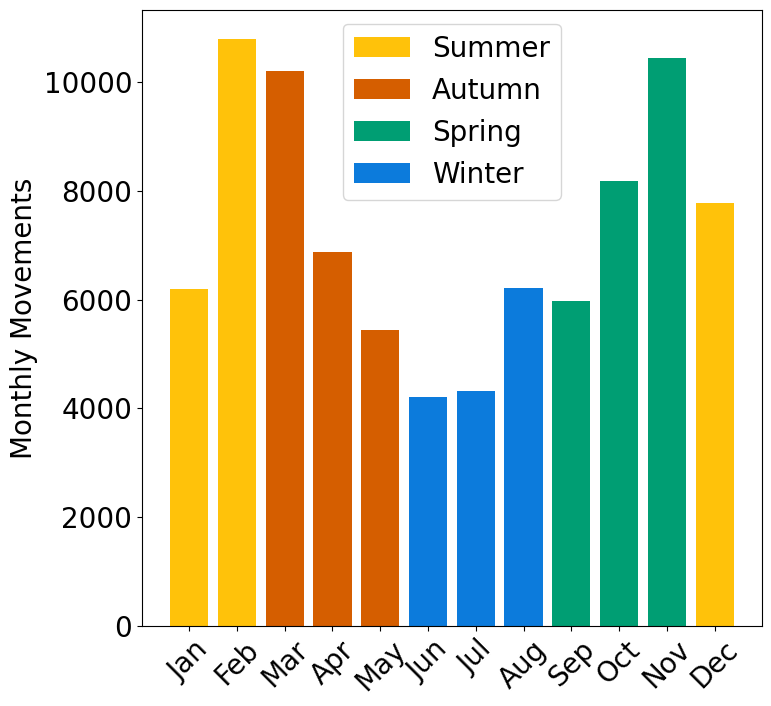

In [16]:
month_N = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
summer = "#FFC20A"
fall = "#D55E00"
winter = "#0C7BDC"
spring = "#009E73"
handles = [
    Patch(facecolor=summer, label="Summer"),
    Patch(facecolor=fall, label="Autumn"),
    Patch(facecolor=spring, label="Spring"),
    Patch(facecolor=winter, label="Winter")
]
colors  = [summer,summer,fall,fall,fall,winter,winter,winter,spring,spring,spring,summer]
fig_x,fig_y = 8,8
fig,axs = plt.subplots(1,1,figsize=(fig_x,fig_y))
fig = plt.bar(month_N,all_TM,color=colors)
plt.rcParams.update({'font.size': 20})
plt.ylabel("Monthly Movements",rotation=90)
plt.legend(handles=handles)
plt.xticks(rotation=45)
plt.savefig("figs/all_moves.png")

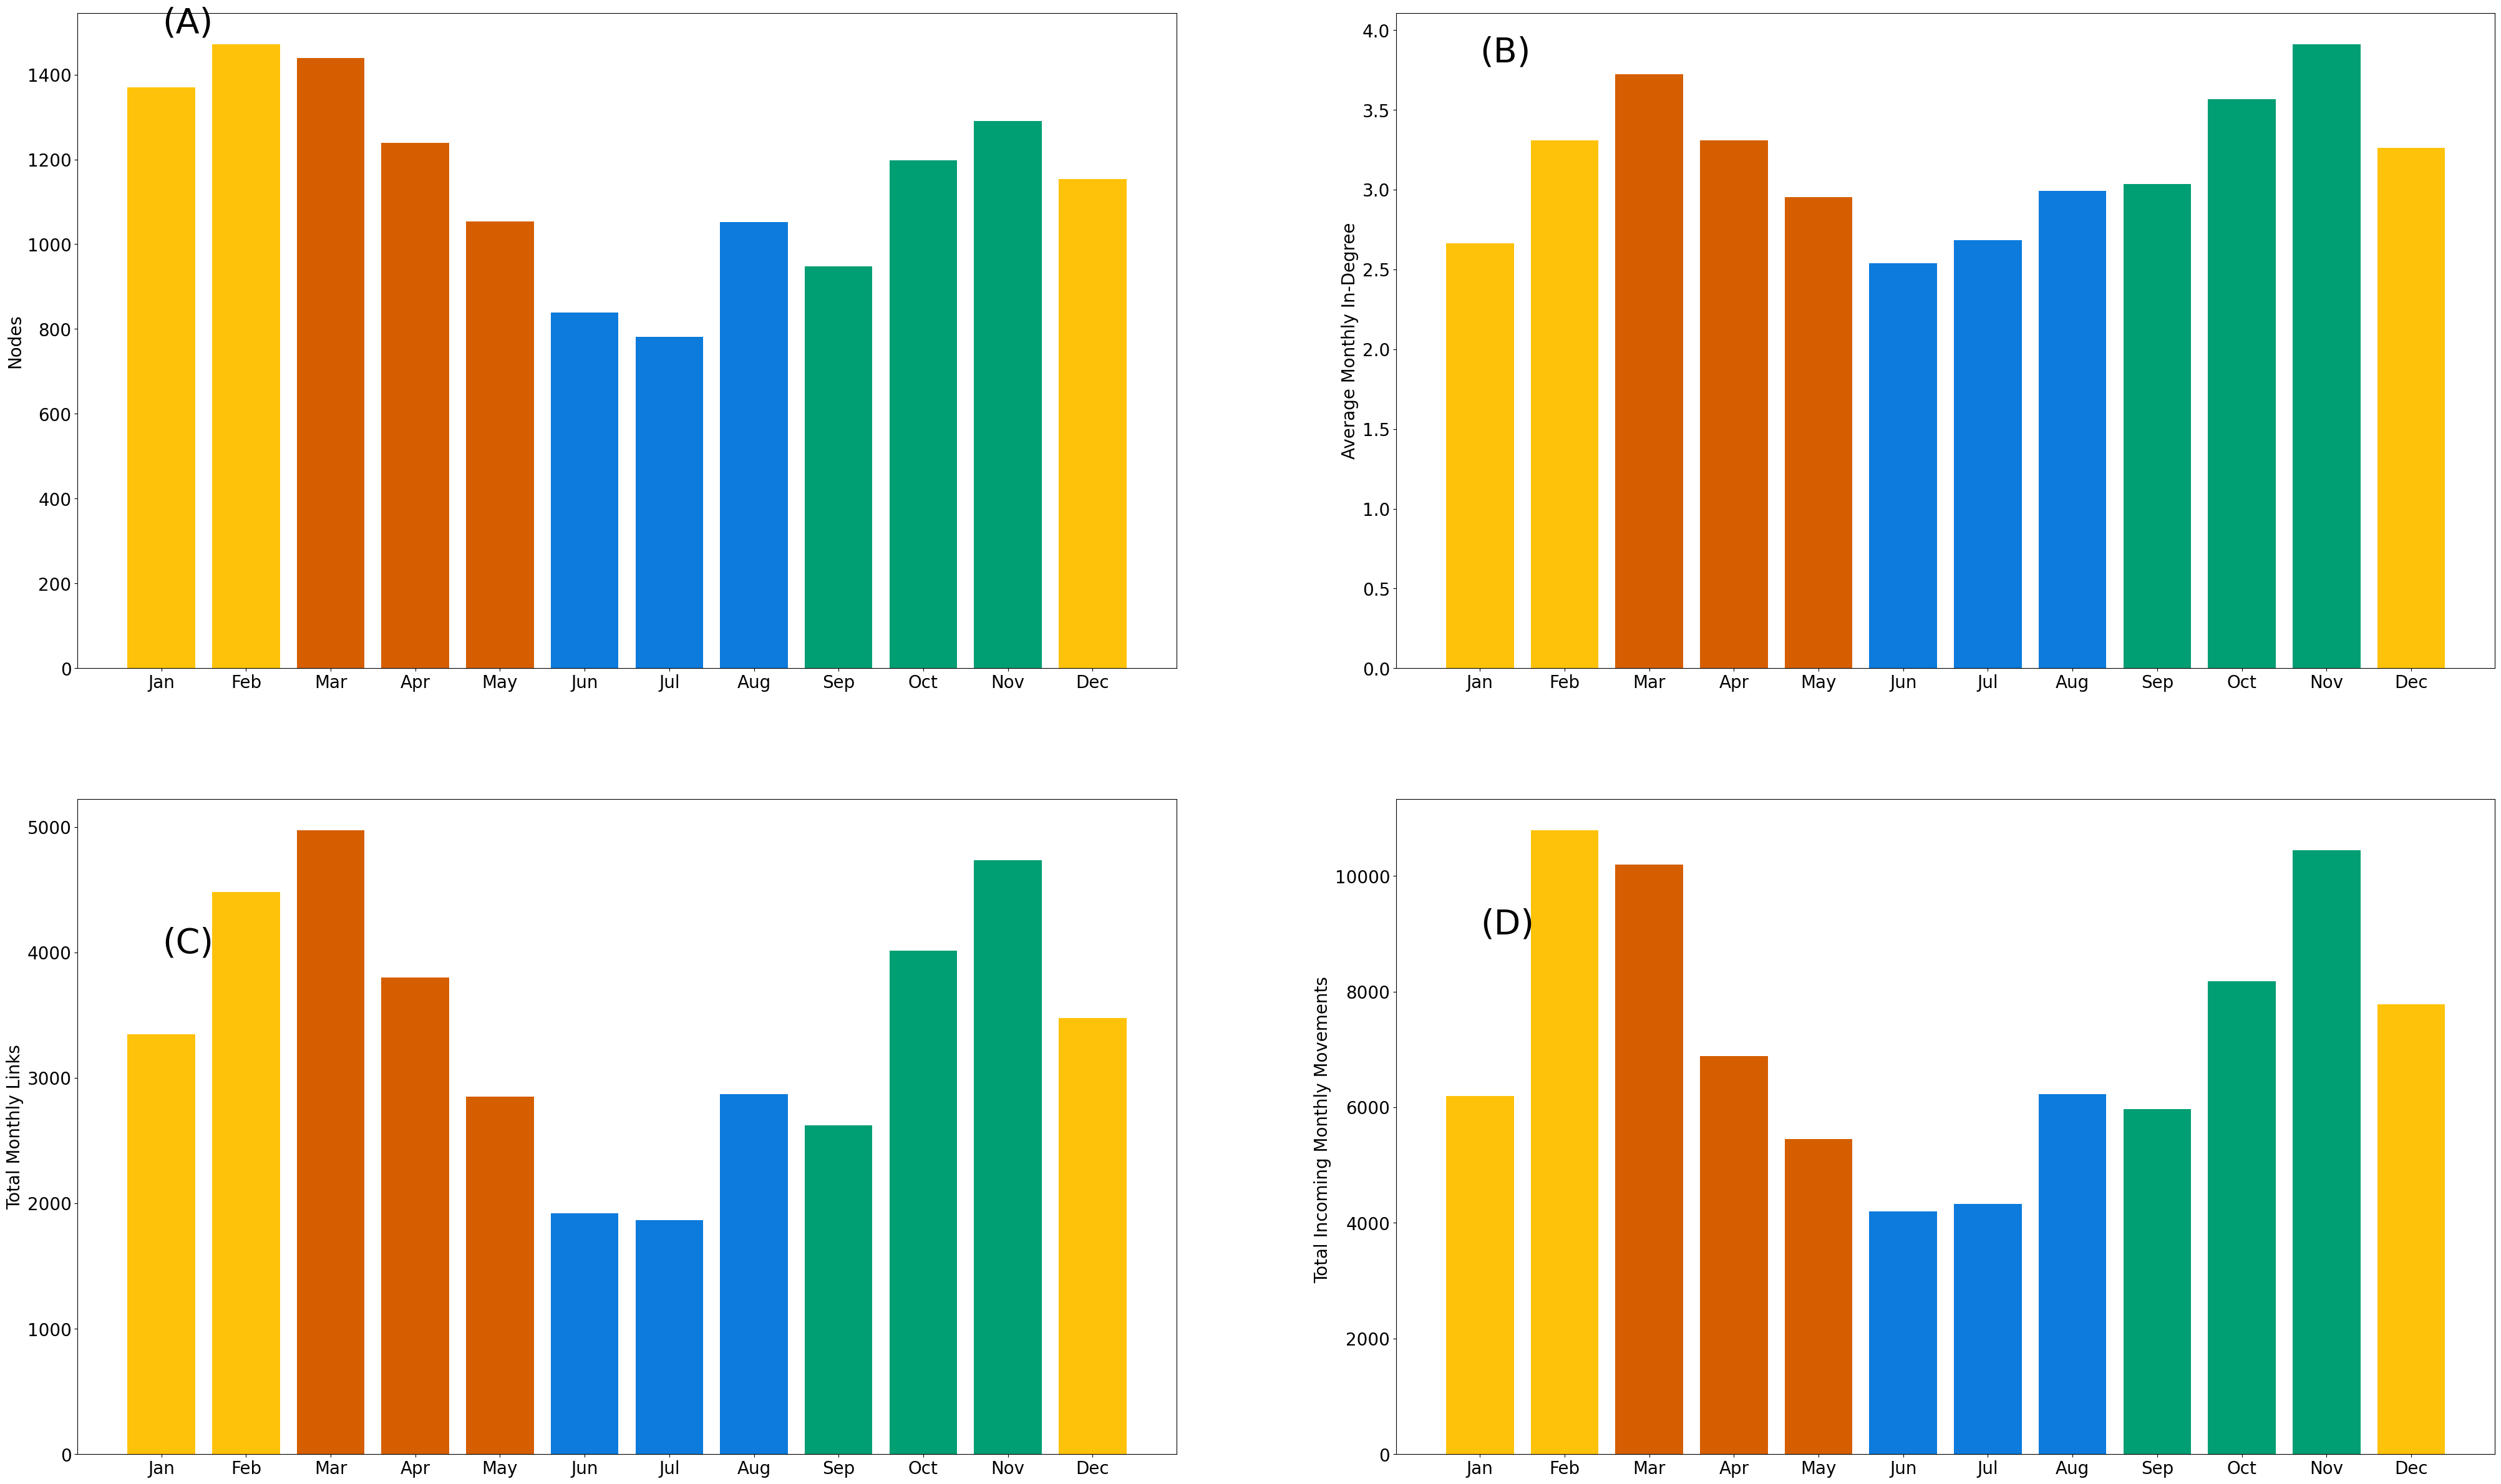

In [7]:
### create monthly plot
fig_x,fig_y = 50,30
fig,axs = plt.subplots(2,2,figsize=(fig_x,fig_y))
month_N = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
summer = "#FFC20A"
fall = "#D55E00"
winter = "#0C7BDC"
spring = "#009E73"
colors  = [summer,summer,fall,fall,fall,winter,winter,winter,spring,spring,spring,summer]
angle = 90
lab_coords = (.05,1500)
lab_fs = 40
plt.rcParams.update({'font.size': 40})
axs[0,0].bar(month_N,all_N,color=colors)
axs[0,0].set_ylabel("Nodes",rotation=angle)
axs[0,1].bar(month_N,all_K,color=colors)
axs[0,1].set_ylabel("Average Monthly In-Degree",rotation=angle)
axs[1,0].bar(month_N,all_OL,color=colors)
axs[1,0].set_ylabel("Total Monthly Links",rotation=angle)
axs[1,1].bar(month_N,all_TM,color=colors)
axs[1,1].set_ylabel("Total Incoming Monthly Movements ",rotation=angle)
axs[0,0].annotate("(A)",(.01,1500),fontsize=lab_fs)
axs[0,1].annotate("(B)",(0,3.8),fontsize=lab_fs)
axs[1,0].annotate("(C)",(.01,4000),fontsize=lab_fs)
axs[1,1].annotate("(D)",(.01,9000),fontsize=lab_fs)

fig.savefig("figs/monthly_vary.png")

In [23]:
### now, we find seasonal statistics
months = 4
tau = 90
avg_N = 0
avg_K = 0
avg_OL = 0
seasons = ["SM","AT","WT","SP"]
all_OW,all_IW,all_N,all_K,all_K,all_OL,all_TM = [],[],[],[],[],[],[]
for s in seasons:
    fn = str(s)
    fn = "../params/new_season_tau/"+fn+"_2022.csv"
    G,id_idx = create_directed_network(fn)
    #Create graph of all nodes
    in_data,out_data = read_network_data(fn)
    N,OL,IL,K,IW,OW,TM = print_stats(in_data,out_data,tau)
    avg_N += N
    avg_OL += OL
    avg_IW += IW
    avg_K += K
    avg_OW += OW
    all_OW.append(OW)
    all_IW.append(IW)
    all_N.append(N)
    all_K.append(K)
    all_OL.append(OL)
    all_TM.append(TM)
avg_N = avg_N/months
avg_OW = avg_OW/months
avg_OL = avg_OL/months
avg_K = avg_K/months
avg_IW = avg_IW/months
#avg_TM = all_TM/months
print("seasonal average nodes: ",avg_N)
print("seasonal average links: ",avg_OL)
print("seasonal average incoming weights: ",avg_IW)
print("seasonal average degree: ",avg_K)
print("seasonal average outgoing weights: ",avg_OW)

seasonal average nodes:  1626.5
seasonal average links:  8124.0
seasonal average incoming weights:  54.568308001561746
seasonal average degree:  5.220168276454754
seasonal average outgoing weights:  0.04038011181863973


In [ ]:
### create monthly plot
print(all_TM)
fig_x,fig_y = 25,10
fig,axs = plt.subplots(2,2,figsize=(fig_x,fig_y))
season_N = ["Summer","Autumn","Winter","Spring"]
summer = "#FFC20A"
fall = "#D55E00"
winter = "#0C7BDC"
spring = "#009E73"
colors  = [summer,fall,winter,spring]
plt.rcParams.update({'font.size': 24})
axs[0,0].bar(season_N,all_N,color=colors)
axs[0,0].set_ylabel("N")
axs[0,1].bar(season_N,all_K,color=colors)
axs[0,1].set_ylabel("<K>")
axs[1,0].bar(season_N,all_TM,color=colors)
axs[1,0].set_ylabel("TM")
axs[1,1].bar(season_N,all_IW,color=colors)
axs[1,1].set_ylabel("<W>")
fig.savefig("figs/season_vary.png")

[24755.0, 22529.0, 14746.0, 24594.0]


In [ ]:
### number of nodes network X? 

In [10]:
all_deg = 0
all_weight = 0
for i in in_data:
    num_deg = len(in_data[i])
    for j in in_data[i]:
        w = in_data[i][j]
        all_weight += (w/365.0)
print("average-degree:",(num_deg/len(in_data)))
print("average weight:",(all_weight/(len(in_data))))

average-degree: 0.0006807351940095302
average weight: 0.04586849688074672
